This project focuses on classifying patient drug reviews into three specific medical conditions—Depression, High Blood Pressure, and Diabetes Type 2—using natural language processing and machine learning techniques. By analyzing textual reviews and patient ratings, the model aims to identify the condition being treated, providing insights into drug effectiveness and patient experiences.

In [ ]:
import pandas as pd
import string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_excel('/content/drugsCom_raw .xlsx')

In [ ]:
df

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,2015-05-31,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,2011-11-01,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,2014-03-15,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,2015-09-19,79


In [ ]:
df.shape

(161297, 7)

In [ ]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37


In [ ]:
df.condition.value_counts()

,count
condition,
Birth Control,28788
Depression,9069
Pain,6145
Anxiety,5904
Acne,5588
...,...
26</span> users found this comment helpful.,1
Patent Ductus Arteriosus,1
Scleroderma,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   161297 non-null  int64         
 1   drugName     161297 non-null  object        
 2   condition    160398 non-null  object        
 3   review       161297 non-null  object        
 4   rating       161297 non-null  int64         
 5   date         161297 non-null  datetime64[ns]
 6   usefulCount  161297 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 8.6+ MB


In [ ]:
df.describe()

,Unnamed: 0,rating,date,usefulCount
count,161297.000000,161297.000000,161297,161297.000000
mean,115923.585305,6.994377,2014-06-11 08:51:43.779983360,28.004755
min,2.000000,1.000000,2008-02-24 00:00:00,0.000000
25%,58063.000000,5.000000,2012-04-12 00:00:00,6.000000
50%,115744.000000,8.000000,2015-06-09 00:00:00,16.000000
75%,173776.000000,10.000000,2016-08-19 00:00:00,36.000000
max,232291.000000,10.000000,2017-12-12 00:00:00,1291.000000
std,67004.445170,3.272329,NaN,36.403742


In [ ]:
# Keep only the conditions we are interested in
conditions = ['Depression', 'High Blood Pressure', 'Diabetes, Type 2']
df = df[(df['condition']=='Depression') | (df['condition']=='High Blood Pressure') | (df['condition']=='Diabetes, Type 2')]

In [ ]:
df

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
11,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,2017-03-09,54
31,96233,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,2011-05-07,3
44,121333,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4,2016-04-27,3
50,156544,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,2017-10-24,24
67,131909,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,2013-06-20,166
...,...,...,...,...,...,...,...
161251,198130,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4,2009-07-15,39
161258,34443,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1,2009-07-18,25
161278,86533,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9,2015-10-23,47
161286,93069,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2,2016-07-17,33


In [ ]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
11,75612,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,2017-03-09,54
31,96233,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,2011-05-07,3
44,121333,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4,2016-04-27,3
50,156544,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,2017-10-24,24
67,131909,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,2013-06-20,166


In [ ]:
df.shape

(13944, 7)

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
drugName,0
condition,0
review,0
rating,0
date,0
usefulCount,0


In [ ]:
df[df.duplicated()]

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount


In [ ]:
X = df.drop(['Unnamed: 0','drugName','rating','date','usefulCount'],axis=1)

# EDA

In [ ]:
X.condition.value_counts()

,count
condition,
Depression,9069
"Diabetes, Type 2",2554
High Blood Pressure,2321


In [ ]:
X.head()

,condition,review
11,Depression,"""I have taken anti-depressants for years, with..."
31,Depression,"""1 week on Zoloft for anxiety and mood swings...."
44,Depression,"""my gp started me on Venlafaxine yesterday to ..."
50,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l..."
67,Depression,"""This medicine saved my life. I was at my wits..."


In [ ]:
# segregation dataframe for analyzing individual condition
X_dep=X[(X['condition']=='Depression')]
X_bp=X[(X['condition']=='High Blood Pressure')]
X_diab=X[(X['condition']=='Diabetes, Type 2')]

Text(0.5, 1.0, 'Word cloud for Depression')

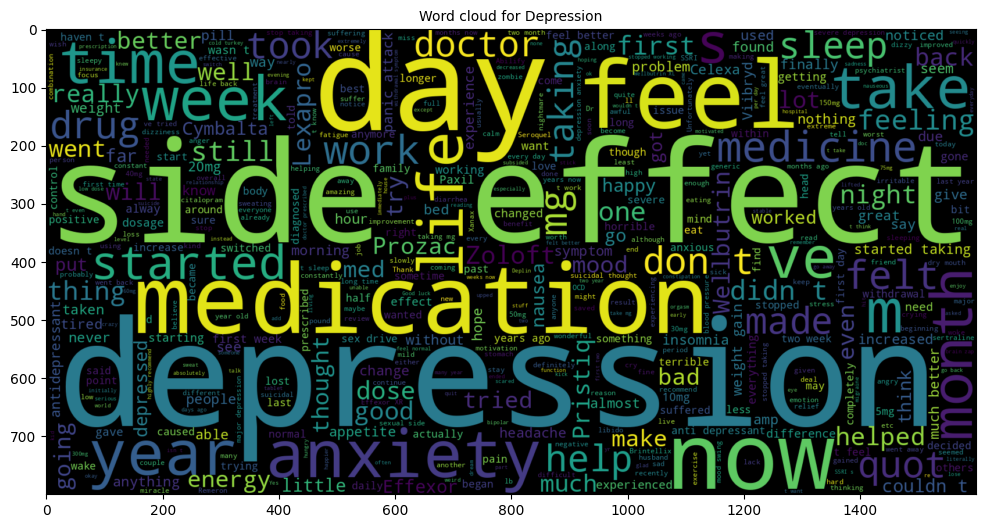

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize = (12,10))
wc = WordCloud(max_words= 500 , width = 1600, height = 800).generate(" ".join(X_dep.review))
plt.imshow(wc, interpolation= 'bilinear')
plt.title('Word cloud for Depression', fontsize=10)

Text(0.5, 1.0, 'Word cloud for Blood pressure')

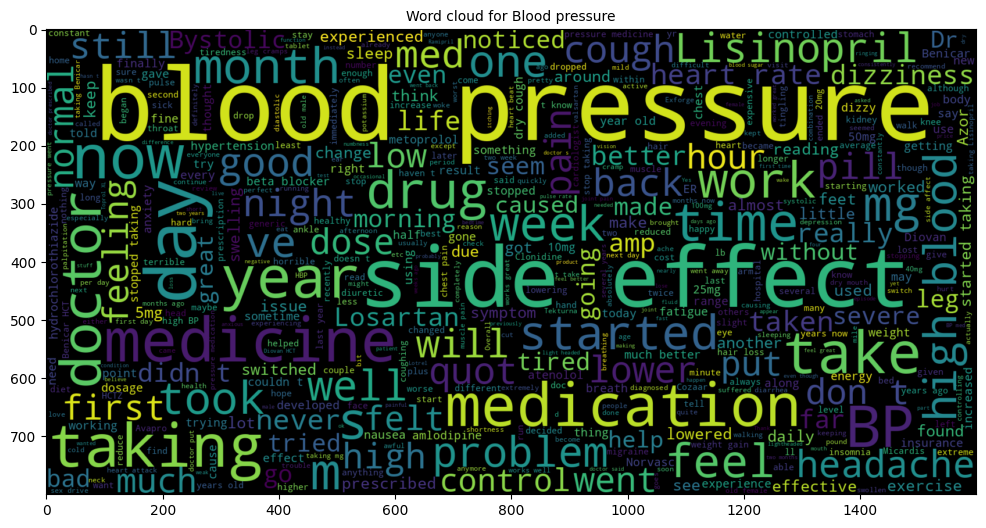

In [ ]:
plt.figure(figsize = (12,10))
wc = WordCloud(max_words= 500 , width = 1600, height = 800).generate(" ".join(X_bp.review))
plt.imshow(wc, interpolation= 'bilinear')
plt.title('Word cloud for Blood pressure', fontsize=10)

Text(0.5, 1.0, 'Word cloud for Diabetes Type 2')

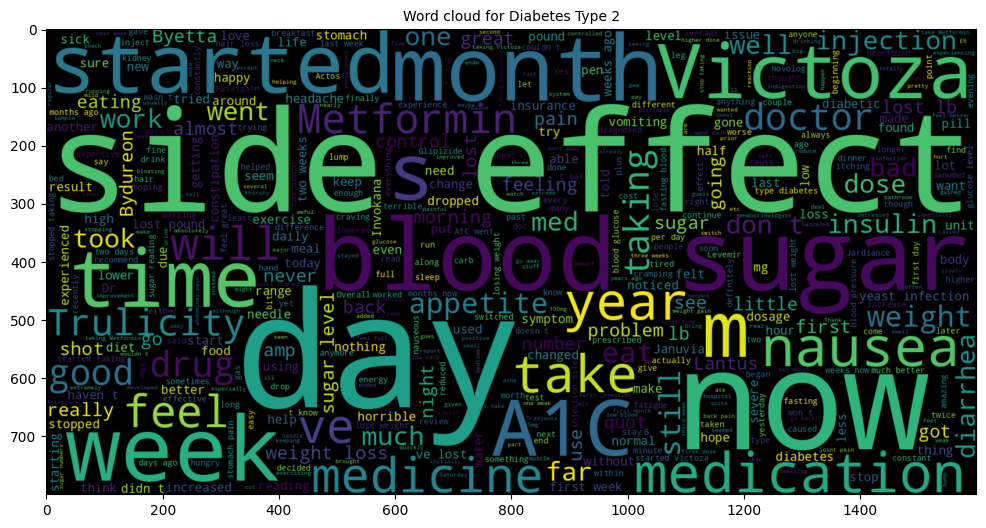

In [ ]:
plt.figure(figsize = (12,10))
wc = WordCloud(max_words= 500 , width = 1600, height = 800).generate(" ".join(X_diab.review))
plt.imshow(wc, interpolation= 'bilinear')
plt.title('Word cloud for Diabetes Type 2', fontsize=10)

In [ ]:
# For text processing
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#  Clean the text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # lowercase
    text = text.lower()

    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

     # remove numbers
    text = re.sub(r'\d+', '', text)

     # split words
    tokens = text.split()

    # remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # join words back
    text = ' '.join(tokens)
    return text

# Apply to all reviews
df['clean_review'] = df['review'].apply(preprocess_text)
df[['drugName','condition','review', 'clean_review']].head()

<ipython-input-25-b2c302dafc5f>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_review'] = df['review'].apply(preprocess_text)


,drugName,condition,review,clean_review
11,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",taken antidepressant year improvement mostly m...
31,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",week zoloft anxiety mood swing take mg morning...
44,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",gp started venlafaxine yesterday help depressi...
50,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",hey guy month since last post wanted give mont...
67,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",medicine saved life wit end antidepressant rea...


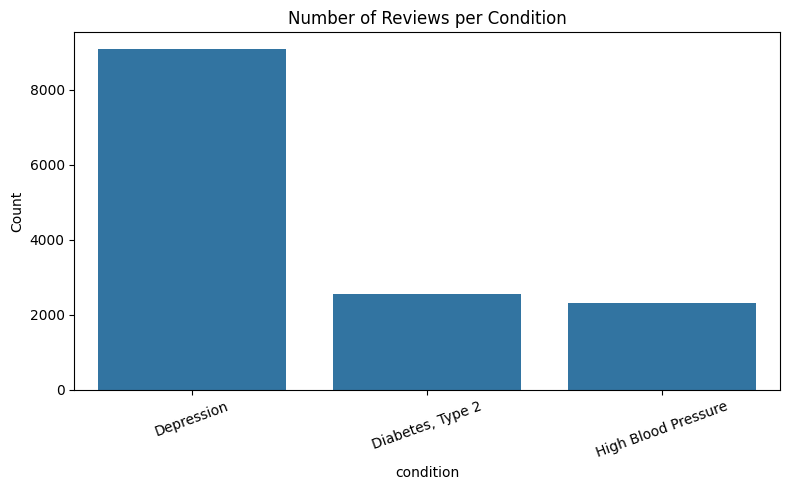

In [ ]:
# Plot number of reviews per condition
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='condition', order=df['condition'].value_counts().index)
plt.title("Number of Reviews per Condition")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

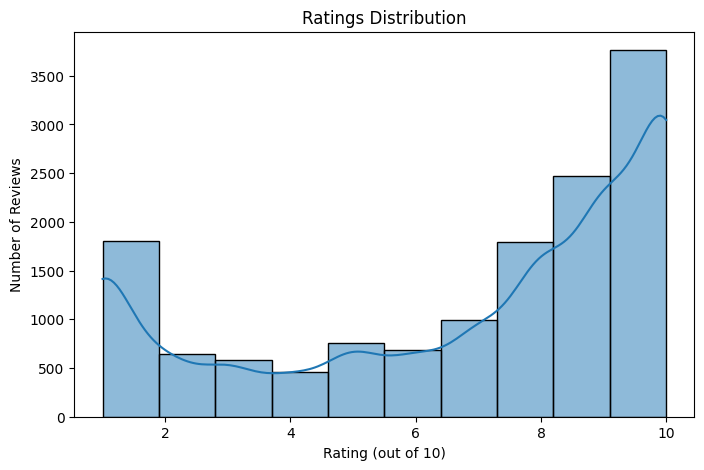

In [ ]:
# Distribution of Ratings
# Histogram of ratings
plt.figure(figsize=(8,5))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Ratings Distribution')
plt.xlabel('Rating (out of 10)')
plt.ylabel('Number of Reviews')
plt.show()

<ipython-input-28-647d22d22272>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_length'] = df['clean_review'].apply(lambda x: len(x.split()))


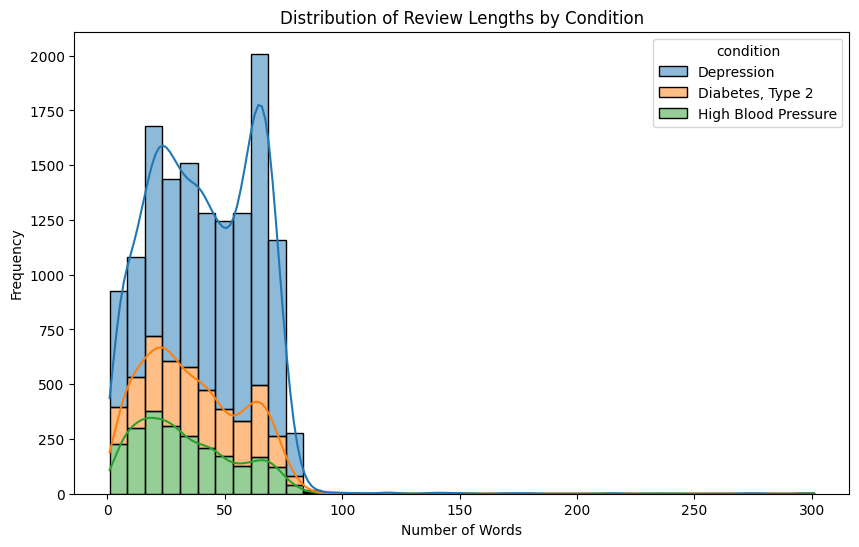

In [ ]:
# Add a column for review length
df['review_length'] = df['clean_review'].apply(lambda x: len(x.split()))

# Histogram of review lengths by condition
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='review_length', hue='condition', bins=40, kde=True, multiple='stack')
plt.title("Distribution of Review Lengths by Condition")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

<ipython-input-29-7eece0c622eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_review_length'] = df['clean_review'].apply(lambda x: len(x.split()))


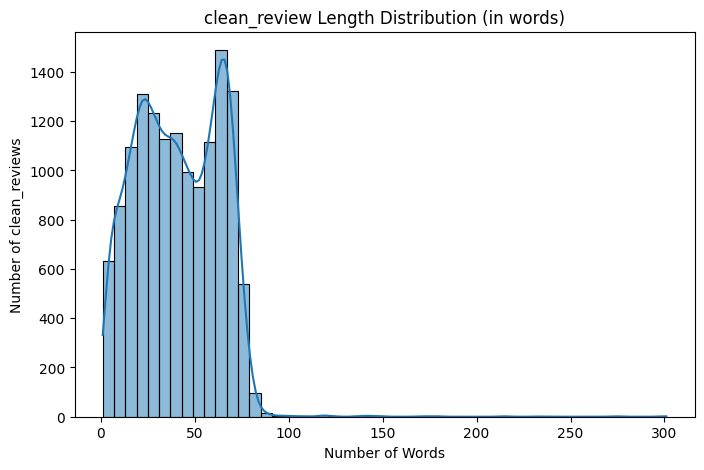

In [ ]:
# Length of Clean Reviews
# Add a column: Clean review length
df['clean_review_length'] = df['clean_review'].apply(lambda x: len(x.split()))

# Plot distribution
plt.figure(figsize=(8,5))
sns.histplot(df['clean_review_length'], bins=50, kde=True)
plt.title('clean_review Length Distribution (in words)')
plt.xlabel('Number of Words')
plt.ylabel('Number of clean_reviews')
plt.show()

condition
Depression             7.099460
Diabetes, Type 2       6.611981
High Blood Pressure    6.214994
Name: rating, dtype: float64


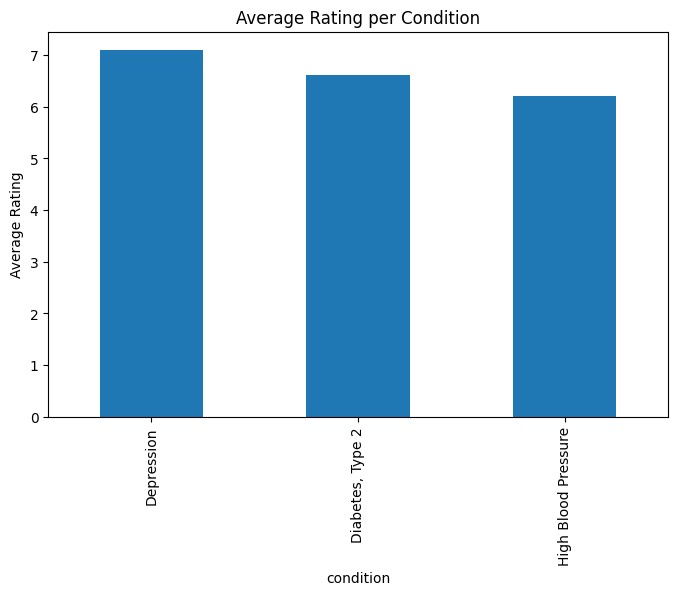

In [ ]:
# Average Rating per Condition
# Mean rating per condition
avg_ratings = df.groupby('condition')['rating'].mean().sort_values(ascending=False)

print(avg_ratings)

# Bar plot
avg_ratings.plot(kind='bar', figsize=(8,5), title='Average Rating per Condition')
plt.ylabel('Average Rating')
plt.show()

Depression again leads with the highest average rating, approximately 7.1 out of 10.
Diabetes, Type 2 has a slightly lower average rating, around 6.6.
High Blood Pressure has the lowest average rating, about 6.2.

Treatments for Depression are not only more frequently reviewed but also more positively rated compared to the other two conditions.
This might suggest higher user satisfaction with depression-related medications or perhaps more engagement from users experiencing improvement.
Conversely, High Blood Pressure treatments receive the least number of reviews and the lowest satisfaction.


[ ]


# Splitting the dataset

In [ ]:
# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Model Preparation
# Feature and label
X = df['clean_review']
y = df['condition']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11155,), (2789,), (11155,), (2789,))

In [ ]:
# Save the test indices so we can refer back to the original rows
X_test_indices = X_test.index

In [ ]:
# Vectorization (TF-IDF)
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['condition'])  # Maps each condition to a number

# Continue with train-test split
X_train, X_test, y_train, y_test = train_test_split(df['clean_review'], df['label'], test_size=0.2, random_state=42)

<ipython-input-36-6fe4c626e812>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = label_encoder.fit_transform(df['condition'])  # Maps each condition to a number


In [ ]:
X_train_tfidf.shape,y_train.shape,X_train.shape

((11155, 5000), (11155,), (11155,))

# Model Building

1. Logistic Regression

In [ ]:
# Model Building
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [ ]:
# Predictions
y_pred = model.predict(X_test_tfidf)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 2, 0])

# Model Evaluation

Accuracy: 0.9537468626747938

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1800
           1       0.97      0.92      0.95       501
           2       0.95      0.85      0.89       488

    accuracy                           0.95      2789
   macro avg       0.96      0.92      0.94      2789
weighted avg       0.95      0.95      0.95      2789



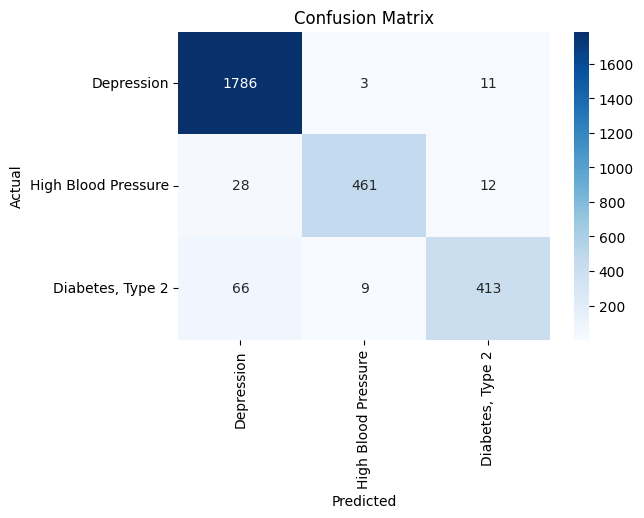

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=conditions, yticklabels=conditions)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

2. Multinomial Naive Bayes

 TF-IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_review'])

Label Encoding

In [ ]:
le = LabelEncoder()
y = le.fit_transform(df['condition'])  # y is now numeric

 Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Report:")
print(classification_report(y_test, y_pred_nb, target_names=le.classes_))

Naive Bayes Report:
                     precision    recall  f1-score   support

         Depression       0.91      1.00      0.95      1800
   Diabetes, Type 2       0.98      0.87      0.92       501
High Blood Pressure       0.97      0.74      0.84       488

           accuracy                           0.93      2789
          macro avg       0.95      0.87      0.90      2789
       weighted avg       0.93      0.93      0.93      2789



3. Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("SVM Report:")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))

SVM Report:
                     precision    recall  f1-score   support

         Depression       0.97      0.99      0.98      1800
   Diabetes, Type 2       0.98      0.96      0.97       501
High Blood Pressure       0.96      0.90      0.93       488

           accuracy                           0.97      2789
          macro avg       0.97      0.95      0.96      2789
       weighted avg       0.97      0.97      0.97      2789



4. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

Random Forest Report:
                     precision    recall  f1-score   support

         Depression       0.96      0.99      0.97      1800
   Diabetes, Type 2       0.98      0.93      0.96       501
High Blood Pressure       0.96      0.88      0.92       488

           accuracy                           0.96      2789
          macro avg       0.97      0.93      0.95      2789
       weighted avg       0.96      0.96      0.96      2789



# Deployment

In [ ]:
from sklearn.linear_model import LogisticRegression
import pickle

# Train the model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)

# Save the trained model
with open("model1.pkl", "wb") as f:
    pickle.dump(clf, f)

# Save the TF-IDF vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

# Save the label encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

# Create the Streamlit App File (app1.py)

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 115.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.4 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pickle
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


nltk.download('wordnet')     # Main lemmatizer corpus
nltk.download('omw-1.4')     # Required for some WordNet dependencies
nltk.download('stopwords')
nltk.download('wordnet')

# Load model, vectorizer, and encoder
with open("model1.pkl", "rb") as f:
    model = pickle.load(f)

with open("vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)

with open("label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

# Preprocessing function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Streamlit UI
st.title("Drug Review Condition Classifier")
st.write("Enter a patient review and the model will predict the condition.")

review_input = st.text_area("Enter patient review here:")

if st.button("Predict Condition"):
    if review_input.strip() == "":
        st.warning("Please enter a review.")
    else:
        cleaned = clean_text(review_input)
        vect_text = vectorizer.transform([cleaned])
        prediction = model.predict(vect_text)
        condition = label_encoder.inverse_transform(prediction)[0]
        st.success(f"Predicted Condition: **{condition}**")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2025-05-10 07:32:25.922 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 07:32:26.010 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-10 07:32:26.012 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-10 07:32:26.014 Thread 'MainThread': missing ScriptRunContext! This warning can

In [ ]:
"""Create requirements.txt File"""
reqs = '''streamlit
scikit-learn
pandas
numpy
'''
with open("requirements.txt", "w") as f:
    f.write(reqs)


In [ ]:
"""Download All 4 Files from Colab"""
from google.colab import files

files.download('app1.py')
files.download('model1.plk')
files.download('vectorizer.plk')
files.download('label_encoder.plk')
files.download('requirements.txt')

In [ ]:
# This the link of the streamit app
# http://localhost:8501/